In [2]:
# Parkinsonics - Diagnosing Missingness of Data
# Kevin Li
# 06.16.2020

import missingno as msno
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multitest as smt
import statsmodels.api as sm
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import os

# Load MDS-UPDRS, SF36 scores

In [3]:
mdsdf=pd.read_excel(r'C:\Users\kevin\Documents\JHU\Labs\Parkinsonics\Other Measures\MDS-UPDRS_MOTOR Total_all_visits_10182016.xlsx')
sfdf=pd.read_excel(r'C:\Users\kevin\Documents\JHU\Labs\Parkinsonics\Other Measures\SF-36_all_visits_08262016.xlsx')

# Load randomization patient ID list
IDdf=pd.read_excel(r'C:\Users\kevin\Documents\JHU\Labs\Parkinsonics\Parkinsonics_RandID_ List_DID.xlsx')
IDdf=IDdf[:-5]
S_group=IDdf.loc[IDdf['First Intervention']=='S']
D_group=IDdf.loc[IDdf['First Intervention']=='D']
M_gen=IDdf.loc[IDdf['Gender']=='M']
F_gen=IDdf.loc[IDdf['Gender']=='F']

#Clean datatypes
IDdf['ID']=IDdf['ID'].astype(float)
IDsort=IDdf['ID'].sort_values().reset_index()['ID']



MDS-UPDRS:

Scores have no missing values, only totals for each tp

SF-36:

In [23]:
miss_count=0
tot_count=0
for col in range(len(sfdf.columns)):
    for row in range(26):
        tot_count+=1
        if np.isnan(sfdf.iloc[row, col]):
            miss_count+=1
                
miss_ratio=miss_count/tot_count
miss_ratio

0.020028358738036156

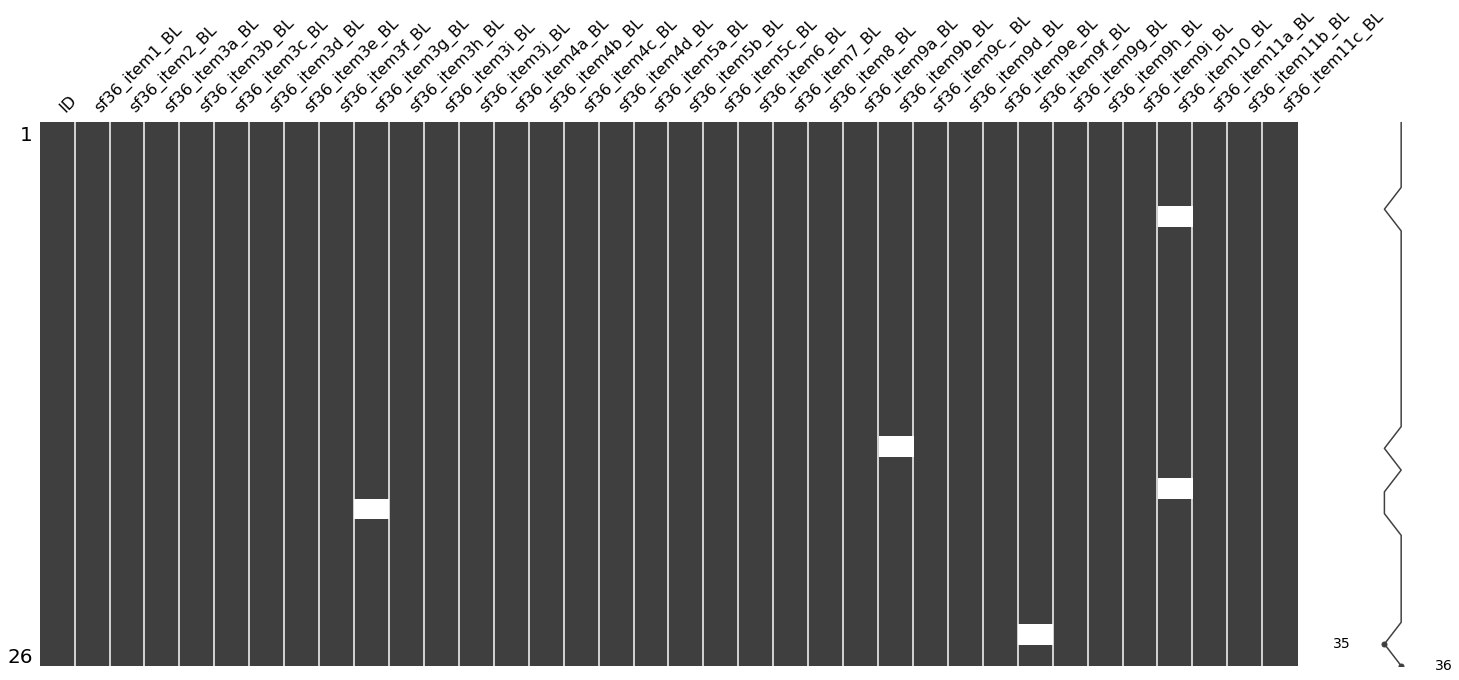

In [15]:
msno.matrix(sfdf.iloc[:, :36])

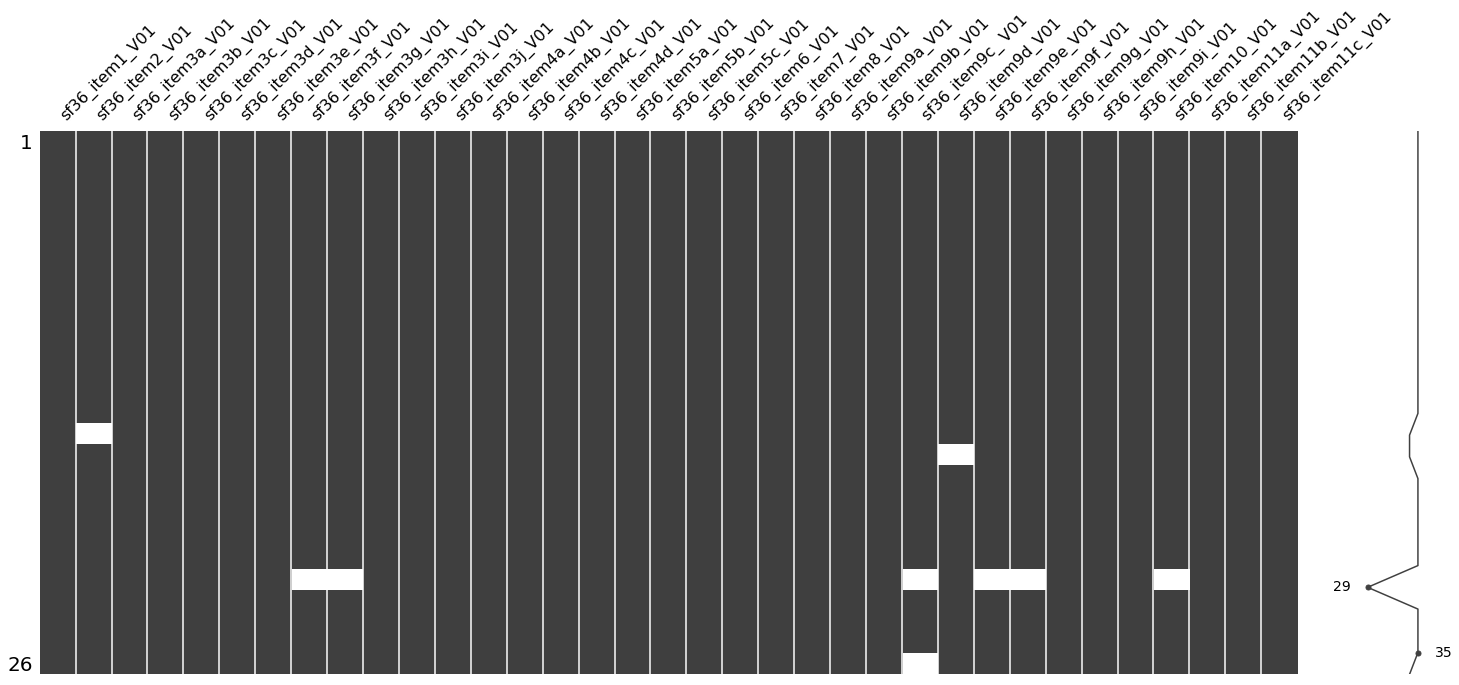

In [16]:
msno.matrix(sfdf.iloc[:, 37:72])

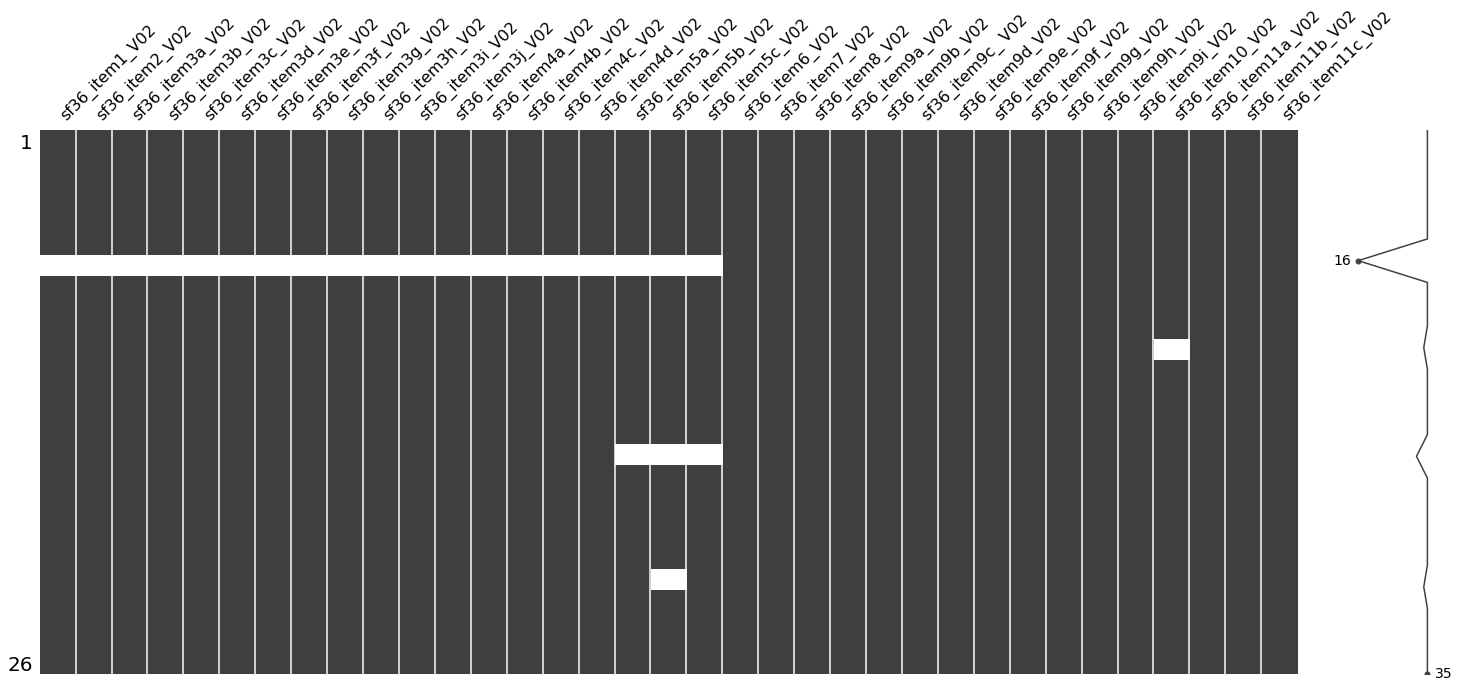

In [17]:
msno.matrix(sfdf.iloc[:, 73:108])

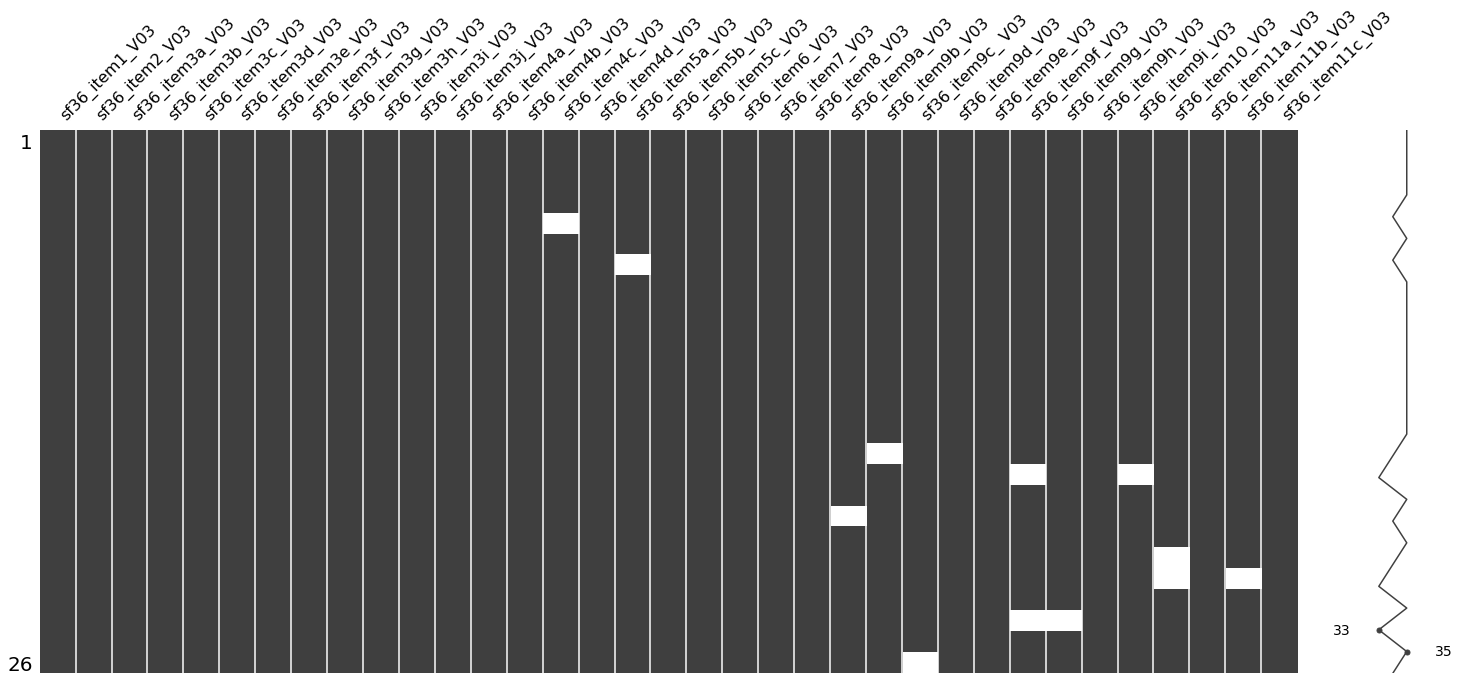

In [18]:
msno.matrix(sfdf.iloc[:, 109:144])

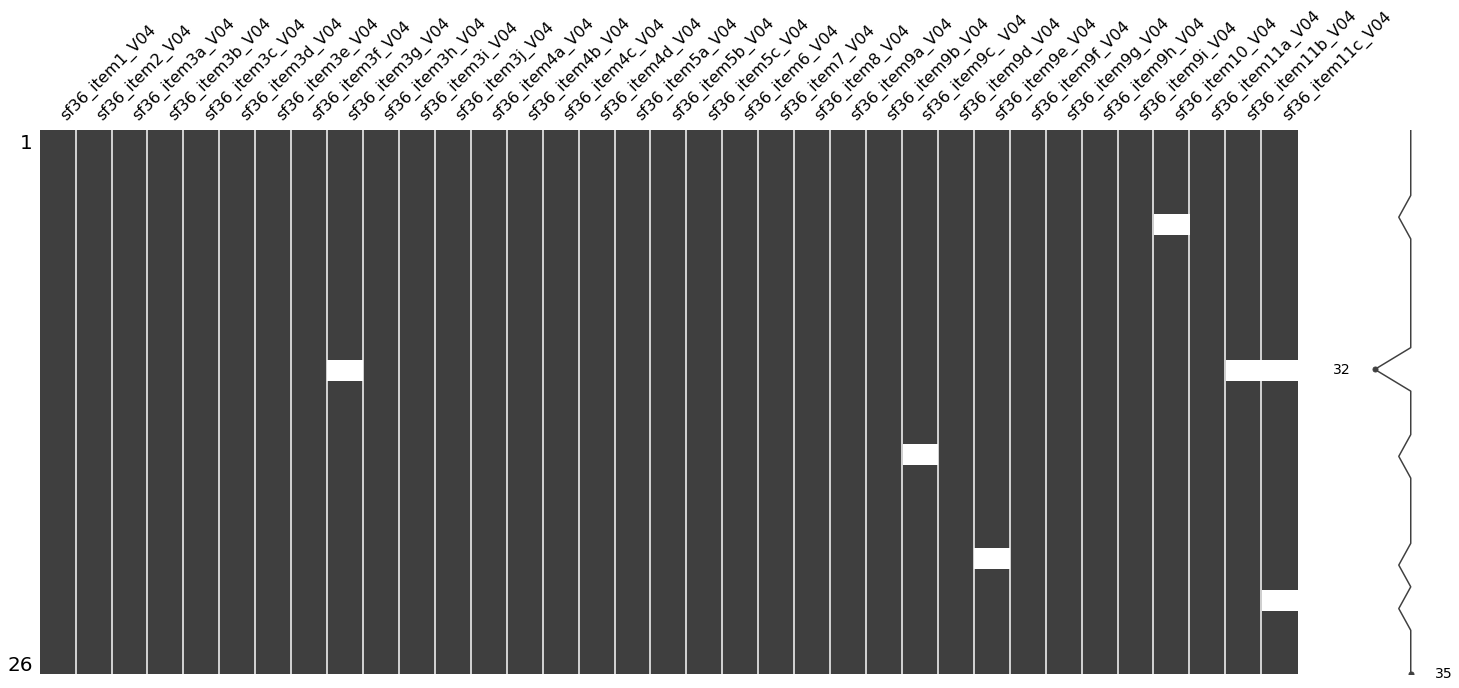

In [19]:
msno.matrix(sfdf.iloc[:, 145:180])

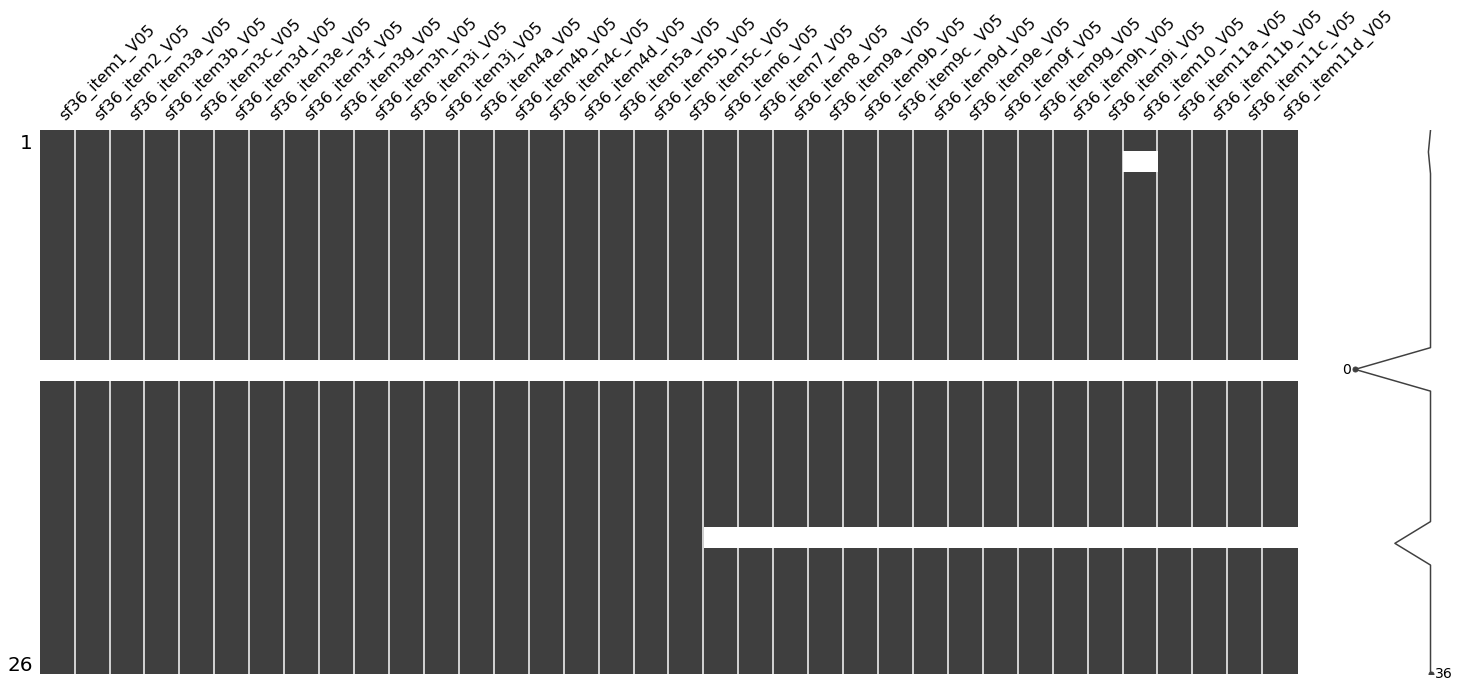

In [20]:
msno.matrix(sfdf.iloc[:, 181:])

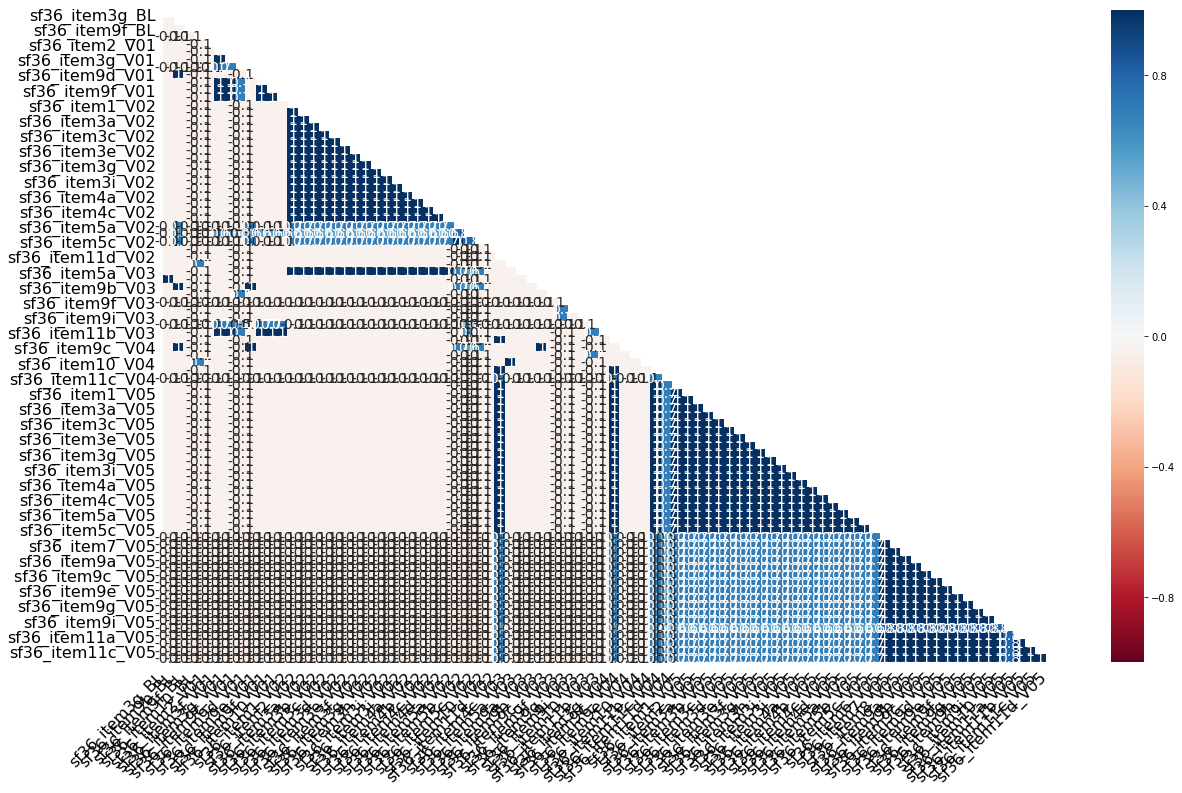

In [24]:
msno.heatmap(sfdf)